In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
import gc

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#追記
import json
import datetime
import math

In [133]:
## LINE VIEW
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
from ipywidgets import interact
import sys
Imgs_For_Line_View = [] #global変数

##################################
#  独自ライブライー： LINE VIEW
# (複数の画像のグラフによる見比べ)
##################################

## 使うときは、これを呼ぶ。(双方向バー表示のため、実態をラップ)
def lv( img1, img2=None, img3=None, img4=None, img5=None ):
    global Imgs_For_Line_View    
    Imgs_For_Line_View =  list(filter( lambda x: x is not None, [img1, img2, img3, img4, img5] ) )
#     if sys.argv[0] is not None:
#         Imgs_For_Line_View.extend(*args)   うまく行かず、、
    interact( lv_real, y = (0, 100, 1) , fig_size=(0,10,1) )

## lvの実態
def lv_real( y=0, fig_size=6 ):
    # 図を作成
    plt.figure(figsize=(fig_size,fig_size))
    plt.xticks(fontsize=4)
    plt.yticks(fontsize=4)

    
    for idx, tmp_img in enumerate( Imgs_For_Line_View):
        tmp_pixel_list=[]
        if  len(tmp_img.shape) >2 and tmp_img.shape[2] >1 : # RGBの３色残ってるときは、白黒に。
            tmp_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        h0 = Imgs_For_Line_View[idx].shape[0] # 画像の高さ
        w0 = Imgs_For_Line_View[idx].shape[1] # 画像の横幅

        # 作図用にピクセルを参照
        for x in range(w0):
            pix = tmp_img[y, x]
            tmp_pixel_list.append(pix)
        plt.plot( tmp_pixel_list, label=idx, linewidth = 0.3 )


    plt.legend()
    plt.show()
    
## 独自ライブライー、LINE VIEW
########################

In [134]:
def myplot(img, img2=None, img3=None, img4=None):

    imgs = [img, img2, img3, img4]
    
    for idx, tmp_img in enumerate(imgs):

        if tmp_img is None:
            continue
        tmp_img = tmp_img.astype(np.uint8)
        im4p = cv2.cvtColor(tmp_img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, len(imgs), idx+1)
        plt.imshow(im4p)

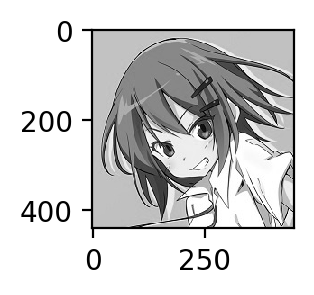

In [135]:
import cv2
import numpy as np

def main():
    img = cv2.imread("./sample/3-7/input.jpg")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    dst2 = cv2.resize(gray, (gray.shape[1]*2, gray.shape[0]*2 ), interpolation = cv2.INTER_NEAREST)

    myplot(dst2)
main()

In [136]:
print(gray.shape[0])
print(gray.shape[1])

gray[219,220]

220
225


185

In [137]:
img = cv2.imread("./sample/3-7/input.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [138]:
# @interact

lv(gray)


# lv(gray, fig_size:(-10,10, 1))


interactive(children=(IntSlider(value=0, description='y'), IntSlider(value=6, description='fig_size', max=10),…